In [2]:
import os
import numpy as np

import keras
import keras_metrics as km
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical

import sys
import random
import pandas as pd
import csv
import xlrd

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

In [3]:
trainingData = pd.read_csv("C:/Users/eric/Desktop/ML/OHW/bank-additional/bank-additional-full1.csv")
trainingData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
testingData = pd.read_csv("C:/Users/eric/Desktop/ML/OHW/bank-additional/bank-additional1.csv")
testingData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
trainingData=trainingData.dropna()
testingData=testingData.dropna()

In [6]:
labelencoder = LabelEncoder()
trainingData['job'] = labelencoder.fit_transform(trainingData['job'])
trainingData['marital'] = labelencoder.fit_transform(trainingData['marital'])
trainingData['education'] = labelencoder.fit_transform(trainingData['education'])
trainingData['default'] = labelencoder.fit_transform(trainingData['default'])
trainingData['housing'] = labelencoder.fit_transform(trainingData['housing'])
trainingData['loan'] = labelencoder.fit_transform(trainingData['loan'])
trainingData['contact'] = labelencoder.fit_transform(trainingData['contact'])
trainingData['month'] = labelencoder.fit_transform(trainingData['month'])
trainingData['day_of_week'] = labelencoder.fit_transform(trainingData['day_of_week'])
trainingData['poutcome'] = labelencoder.fit_transform(trainingData['poutcome'])
trainingData['y'] = labelencoder.fit_transform(trainingData['y'])


testingData['job'] = labelencoder.fit_transform(testingData['job'])
testingData['marital'] = labelencoder.fit_transform(testingData['marital'])
testingData['education'] = labelencoder.fit_transform(testingData['education'])
testingData['default'] = labelencoder.fit_transform(testingData['default'])
testingData['housing'] = labelencoder.fit_transform(testingData['housing'])
testingData['loan'] = labelencoder.fit_transform(testingData['loan'])
testingData['contact'] = labelencoder.fit_transform(testingData['contact'])
testingData['month'] = labelencoder.fit_transform(testingData['month'])
testingData['day_of_week'] = labelencoder.fit_transform(testingData['day_of_week'])
testingData['poutcome'] = labelencoder.fit_transform(testingData['poutcome'])
testingData['y'] = labelencoder.fit_transform(testingData['y'])
trainingData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [7]:
target = ['y']
train_Label = trainingData[target]
train_next = trainingData.drop(target,axis=1)
test_Label = testingData[target]
test_next = testingData.drop(target,axis=1)

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
train_next = min_max_scaler.fit_transform(trainingData)
train_Label = to_categorical(trainingData['y'])
test_next = min_max_scaler.fit_transform(testingData)
test_Label = to_categorical(testingData['y'])
train_Label

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [17]:
from keras import regularizers
model = Sequential()
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_shape=(train_next.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=2,activation='relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Dense(train_Label.shape[1],kernel_initializer='uniform',activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [18]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy',f1_m,precision_m, recall_m])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1408      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
_________________________________________________________________
dropout_3 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 6         
Total params: 1,544
Trainable params: 1,544
Non-trainable params: 0
_________________________________________________________________


In [21]:
train_history = model.fit(x=test_next,y=train_Label,validation_split=0.1,epochs=30,batch_size=512,verbose=0)

In [22]:
loss, accuracy, f1_score, precision, recall = model.evaluate(test_next, test_Label, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.5438762903213501 0.8905074000358582 0.8907460570335388 0.8907461166381836 0.8907461166381836


In [23]:
import matplotlib.pyplot as plt
def showtrain(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

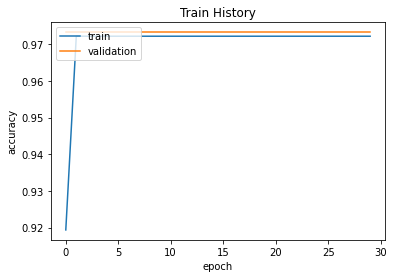

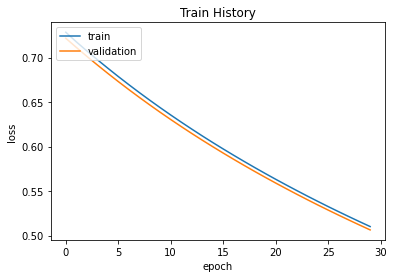

In [24]:
showtrain(train_history,'accuracy','val_accuracy')
showtrain(train_history,'loss','val_loss')